# Домашнее задание 1-3

Это домашнее задание по материалам первых трёх семинаров. Дедлайн по отправке - 02:00 26 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Выберите произвольную несимметричную относительно некоторой вертикальной оси унимодальную функцию и приведите не меньше 3-х итераций метода дихотомии и метода золотого сечения (руками, а не с помощью компьютера). Нарисуйте график выбранной функции с помощью библиотеки matplotlib.

Убедитесь, что Вы выбрали уникальную функцию, которую не выбрал никто из Ваших одногруппников. Две функции считаются одинаковыми, если одну можно получить из другой параллельным переносом.

### Унимодальная функия, график

Будем работать со следующей унимодальной функцией на отрезке $[0, 1]$:
$$f(x) = x^3 - x^2 - 0.1\sin(\pi x)$$
В унимодальности данной функции легко убедиться, исследовав производную на обозначенном выше отрезке.

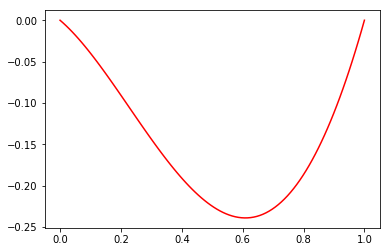

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

f = lambda x: x**3 - x**2 - 0.1 * np.sin(math.pi * x)
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), 'r')

### Дихотомия

Точки измерения функции $c_2 = \frac{a+b}{2}, c_1 = \frac{c_2+b}{2},\,c_3 = \frac{c_2+b}{2}$

* Нулевая итерация a = 0, b = 1. Проверка условий для следующей итерации: $f(c_1) > f(c_2),\,f(c_2) < f(c_3)$

* Первая итерация a = 0.25, b = 0.75. Проверка условий для следующей итерации: $f(c_1) > f(c_2),\,f(c_2) < f(c_3)$

* Вторая итерация a = 0.375, b = 0.625. Проверка условий для следующей итерации: $f(c_2) > f(c_1)$

* Третья итерация a = 0.5, b = 0.625

### Метод золотого сечения

Точки измерения функции: $c_1 = b - \frac{b-a}{\Phi}, c_2 = a + \frac{b-a}{\Phi},$ где $\Phi = \frac{1 +\sqrt{5}}{2}$

* Нулевая итерация a = 0, b = 1, $f(c_1) > f(c_2)$

* Первая итерация a = 0.382, b = 1.000, , $f(c_1) < f(c_2)$

* Вторая итерация a = 0.382, b = 0.764, , $f(c_1) > f(c_2)$

* Третья итерация a = 0.528, b = 0.764


## Задача 2

Запустите метод дихотомии для функции $f(x) = -\sin\left(\frac{2 \pi}{\frac{5}{17} + x}\right)$ на интервале $[0,1]$ и $[0,4]$. Точкой минимума считайте середину итогового отрезка. Одинаковые ли точки минимума? Почему?

### Решение

In [2]:
import numpy as np
import math

def dichotomy(a, b, f):
    c = (a + b) / 2.0
    eps = 1e-4
    while abs(b - a) > eps:
        y = (a + c) / 2.0
        z = (b + c) / 2.0
        if f(y) <= f(c):
            b = c
            c = y
        else:
            if f(c) <= f(z):
                a = y
                b = z
            else:
                a = c
                c = z
    return (a + b) / 2.0

init_f = lambda x: -math.sin(2 * math.pi / (5/17 + x))
sol_1 = dichotomy(0, 1, init_f)
sol_2 = dichotomy(0, 4, init_f)
print('Solution on [0, 1] is %.3f\nSolution on [0, 4] is %.3f\n'%(sol_1, sol_2))

Solution on [0, 1] is 0.800
Solution on [0, 4] is 4.000



Решения на двух отрезках не одинаковые. Данная функция не является унимодальной на обоих отрезках, и метод дихотомии на каждом отрезке сходится к своему локальному минимуму. К какому минимуму сходится метод определяется свойствами функции и предугадать это становится сложно в силу ее неунимодальности.

## Задача 3

Покажите, как свести задачу безусловной **целочисленной** оптимизации к задаче нелинейной условной оптимизации с **непрерывными** переменными. 
Что это говорит о сложности решения происзольной нелинейной задачи оптимизации?

### Решение

ПУсть у нас есть задача целочисленной оптимизации:

$$\min_{\mathbf{x} \in \mathbb{Z}^n} f(\mathbf{x})$$

Заметим, что условие $x_i \in \mathbb{Z},~i = 1, \ldots, n$ выполнено тогда и только тогда, когда $\sin(\pi x_i) = 0,~ i = 1, \ldots, n$. Таким образом задача целочисленной оптимизации сводится к задаче нелинейной условной оптимизации с непрерывными переменными:

$$\min_{\mathbf{x} \in \mathbb{R}^n} f(\mathbf{x})$$
$$s.t.~ \sin(\pi x_i) = 0,~i = 1, \ldots, n$$

Теперь рассмотрим случай, если нас интересуют не всё множество целых чисел, а некоторое его подмножество $x_i \in A_i \ \mathbb{Z}$. В случае если каждое $A_i$ есть такое множество, что существует конечное семейство непересекающихся отрезков или бесконечных полуинтервалов $\mathcal{D}_i$, для которого выполнены следующие условия:
$$A_i \in \cup_{B \in \mathcal{D}_i}B$$
$$\left(\left(\cup_{B \in \mathcal{D}_i}B\right)\backslash A_i\right) \cap \mathbb{Z} = \emptyset$$

Т.е. в объединении промежутков лежат все целые числа из $A_i$ и других целых чисел там нет. Тогда ограничение $x_i \in A_i$ можно заменить на условие $\sin(\pi x_i) = 0$ и $x_i \in B, \forall B\in D_i$ (это условие задается двумя неравенства для отрезков и одним для бесконечных полуинтервалов). Тогда всего новых ограничений на $x_i$ не больше $(2|\mathcal{D}_i| + 1)$ и не меньше $(2|\mathcal{D}_i| - 1)$.

В случае если для $A_i$ нет такого семейства, то такие задачи следует рассматривать отдельно.

Немного о сложности нелинейных задач. Среди них есть некоторое подмножество задач, которые эквиваленты задачам целочисленной оптимизации. Среди этих задач есть задачи из класса $\mathcal{NP}-hard$. Для данных задач пока что не найдено эффективных алгоритмов, из чего следует, что на данный момент общая задача нелинейной оптимизации не может быть решена эффективно. А в предположении $\mathcal{NP} \neq \mathcal{P}$, эффективно решить общие задачи нелинейной оптимизации невозможно.

## Задача 4

__1.__ Скачайте с помощью кода, приведённого ниже, набор фотографий и нарисуйте какую-нибудь из них.

In [1]:
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np

Shape of data = (400, 64, 64)


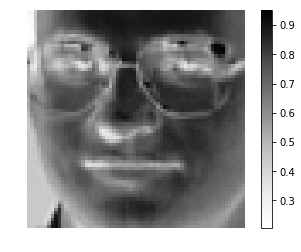

In [6]:
print("Shape of data = {}".format(data["images"].shape))
index = 56
plt.imshow(data["images"][index], cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

__2.__ Одним из способов обработки изображений, например для выделения наиболее важных сегментов используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)). 
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение. 
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Вопросы**

1) является ли эта задача выпуклой и почему?

2) как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?

#### Решение

1) Данная задача не является выпуклой. Рассмотрим матрицы с произвольной матрицей $X$ и матрицами $W = \{w_{ij}\}_{i,j}$ и $H = \{h_{ij}\}_{i,j}$, такими что только $w_{11}$ и $h_{11}$ отличны от нуля. Тогда целевая функция примет вид:

$$f(w_{11}, h_{11}) = \left(x_{11} - w_{11}h_{11}\right)^2 + C$$

Посчитаем гессиан этой функции:

$$Hf = \begin{pmatrix}2h_{11}^2 & 4w_{11}h_{11} - 2x_{11} \\ 4w_{11}h_{11} - 2x_{11} & 2w_{11}^2\end{pmatrix}$$

Детерминант этой матрицы:

$$\Delta = -12(w_{11}h_{11})^2 + 4x_{11}^2 + 16w_{11}h_{11}x_{11}$$

Легко видеть, что при большом $w_{11}h_{11}$ детерминант отрицателен, а, следовательно, по критерию Сильвестра гессина не положительно определен и исходная задача не выпукла.

2) В приложении обработки картинок: $W$ - набор приближений исходных картинок из набора, $H$ - матрица, которая восстанавливает по приближению исходную картинку (скорей всего с некоторой ошибкой). В более общем случае, $W$ - есть матрица базисных векторов в подпространстве $\mathbb{R}^n$ размерности $k$, а матрица $H$ есть разложение матрицы $X$ по базису.

Пиксель характеризуется обычно неотрицательным числом, а каждый элемент $W$ есть пиксель, поэтому разумно предложить поэлементную неотрицательность матрицы $W$.

Неотрицательность матрицы $H$ имеет смысл для того, что при обратном преобразовании $WH$ также получалась матрица с неотрицательными весами, и тогда результат может интерпретироваться как исходный набор. Это может быть удобно, когда нужно высчитать некоторое преобразование исходного множества, и высчитывается преобразование приближения $W$, а далее при помощи  $H$ строится ответ для исходного сета. Неотрицательность $H$ дает возможность легко интерпретировать ответ, как набор картинок.

__3.__ Такую задачу можно решать с помощью CVXPy, если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях решить точно задачу относительно параметра $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и найти решение задачи относительной $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами. От инициализации будет сильно зависеть качество решения и скорость работы методов.

**Задачи**

1) реализуйте с помощью CVXPy идею поперменной оптимизации для этой задачи и решите её

2) нарисуйте график сходимости по функции и убедитесь, что метод сошёлся или же изменение целевой функции пренебрежимо мало

3) поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналгично тому, как были собраны строки матрицы $X$. Нарисуйте 10-50 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос 2) предыдущего пункта? Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

4) Нарисуйте матрицу $W$ с помощью функции ```plt.imshow``` или ```plt.spy```. Насколько сильно она заполнена и почему?

In [1]:
import numpy as np
import cvxpy as cvx
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()

def update(X, W, H):
    eps = 1e-8
    U = cvx.Variable(shape = W.shape)
    obj = cvx.Minimize(cvx.norm(X - U * H, "fro"))
    constraint = [U >= 0]
    prob = cvx.Problem(obj, constraint)
    prob.solve(verbose = True, solver=cvx.SCS, max_iters=100)
    return U.value

def alt_opt(X, eps, k):
    N = 10
    W = np.random.uniform(0, 1, (X.shape[0], k))
    H = np.random.uniform(0, 1, (k, X.shape[1]))
    diff = []
    val_prev, val = 1, np.linalg.norm(X - np.dot(W, H), 'fro')**2
    while abs(val - val_prev) > eps and len(diff) <= N:
        val_prev = val
        W = update(X, W, H)
        H = update(X.transpose(), H.transpose(), W.transpose()).transpose()
        val = np.linalg.norm(X - np.dot(W, H), 'fro')**2
        diff.append(abs(val - val_prev))
    return (W, H, diff)

X = data["images"].reshape(data["images"].shape[0], -1)
W, H, diff = alt_opt(X, 1e-3, 1000)

ModuleNotFoundError: No module named 'cvxpy'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([i for i in range(1, len(diff) + 1)], diff, 'r')

In [ ]:
import cvxpy as cp
import numpy as np

A = data["images"].reshape(data["images"].shape[0], -1)[:100,:100]
m, n = A.shape
k = 10
# Initialize Y randomly.
Y_init = np.random.rand(m, k)

# Ensure same initial random Y, rather than generate new one
# when executing this cell.
Y = Y_init 

# Perform alternating minimization.
MAX_ITERS = 30
residual = np.zeros(MAX_ITERS)
for iter_num in range(1, 1+MAX_ITERS):
    # At the beginning of an iteration, X and Y are NumPy
    # array types, NOT CVXPY variables.

    # For odd iterations, treat Y constant, optimize over X.
    if iter_num % 2 == 1:
        X = cp.Variable(shape=(k, n))
        constraint = [X >= 0]
    # For even iterations, treat X constant, optimize over Y.
    else:
        Y = cp.Variable(shape=(m, k))
        constraint = [Y >= 0]
    
    # Solve the problem.
    # increase max iters otherwise, a few iterations are "OPTIMAL_INACCURATE"
    # (eg a few of the entries in X or Y are negative beyond standard tolerances)
    obj = cp.Minimize(cp.norm(A - Y*X, 'fro'))
    prob = cp.Problem(obj, constraint)
    prob.solve(solver=cp.SCS, max_iters=10000)

    if prob.status != cp.OPTIMAL:
        print("Solver did not converge!")
    
    print('Iteration {}, residual norm {}'.format(iter_num, prob.value))
    residual[iter_num-1] = prob.value

    # Convert variable to NumPy array constant for next iteration.
    if iter_num % 2 == 1:
        X = X.value
    else:
        Y = Y.value